# Классификация отзывов по тональности : негативный, позитивный, нейтральный

In [6]:
pip install nltk

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from tqdm import tqdm
from gensim.models import FastText
import torchtext
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
twitter_data = pd.read_csv('/content/swahili.csv')

In [31]:
twitter_data.shape

(3925, 3)

In [32]:
twitter_data.head()

,Unnamed: 0,text,labels
0,0,team 2019merimera alikuwa takataka,negative
1,1,sijafurahishwa,negative
2,2,kubuni dosari,negative
3,3,bila kusema nilipoteza pesa zangu,negative
4,4,sema kupoteza pesa na wakati,negative


In [33]:
twitter_data.isnull().sum()

Unnamed: 0    0
text          0
labels        0
dtype: int64

In [34]:
twitter_data['labels'].value_counts()

positive    2002
negative    1923
Name: labels, dtype: int64

0 = отрицательный, 1 = положительный, 2 = нейтральный

In [35]:
twitter_data.replace({'labels':{'negative':0}}, inplace=True)
twitter_data.replace({'labels':{'positive':1}}, inplace=True)
twitter_data['labels'].value_counts()

1    2002
0    1923
Name: labels, dtype: int64

In [36]:
twitter_data['stemmed_content'] = twitter_data['text']

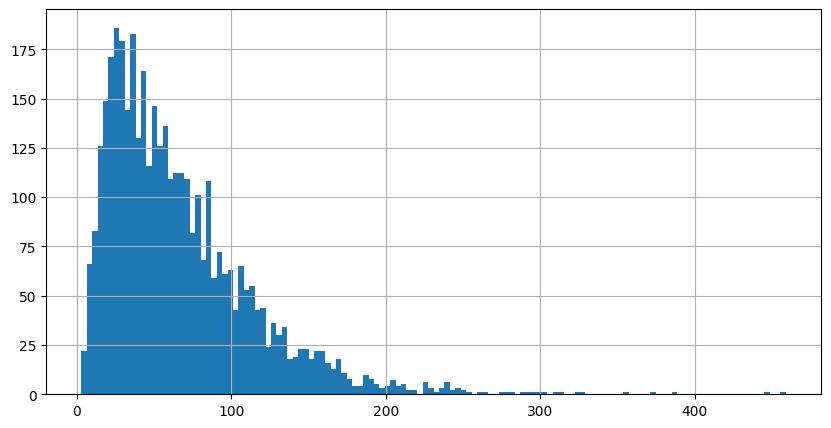

In [37]:
size = [len(tokens) for tokens in twitter_data['text']]

plt.figure(figsize=(10, 5))
plt.hist(size, bins=130)
plt.grid(True)
plt.show()

In [58]:
X = twitter_data['stemmed_content'].values
Y = twitter_data['labels'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model_LogisticRegression = LogisticRegression(max_iter=1000)
model_LogisticRegression.fit(X_train, Y_train)

X_train_prediction_lr = model_LogisticRegression.predict(X_train)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction_lr)

X_train_dense = X_train.toarray()
model_GaussianNB = GaussianNB()
result_bayes = model_GaussianNB.fit(X_train_dense, Y_train)

X_train_prediction_nb = model_GaussianNB.predict(X_train.toarray())
training_data_accuracy_nb = accuracy_score(Y_train, X_train_prediction_nb)

X_test_prediction_lr = model_LogisticRegression.predict(X_test)
test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction_lr)

X_test_prediction_nb = model_GaussianNB.predict(X_test.toarray())
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)

print('Evaluating the accuracy of training data using logistic regression: ' , training_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB training data: ' , training_data_accuracy_nb)

print('Evaluating the accuracy of test data using logistic regression: ' , test_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB test data: ' , test_data_accuracy_nb)

(3925,) (3140,) (785,)
Evaluating the accuracy of training data using logistic regression:  0.9194267515923567
Evaluating the accuracy of Gaussian NB training data:  0.9621019108280254
Evaluating the accuracy of test data using logistic regression:  0.7847133757961784
Evaluating the accuracy of Gaussian NB test data:  0.6675159235668789


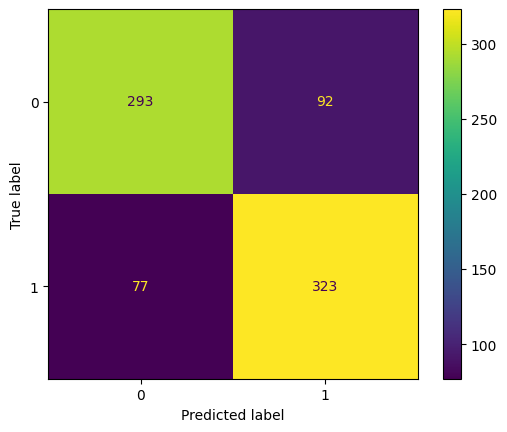

In [51]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_lr)).plot()
plt.show()

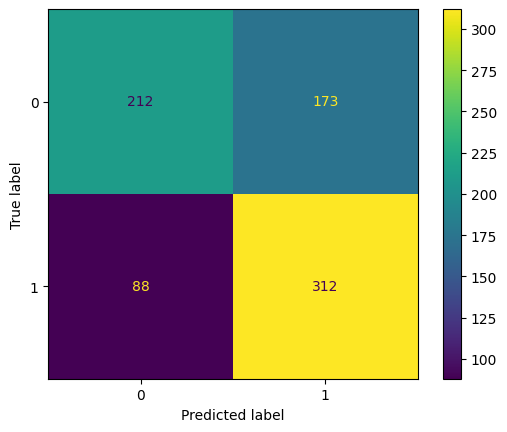

In [52]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_nb)).plot()
plt.show()

In [ ]:
#import pickle
#filename = 'trained_model_LogisticRegression.sav'
#pickle.dump(model_LogisticRegression, open(filename, 'wb'))
#filename = 'trained_model_GaussianNB.sav'
#pickle.dump(model_GaussianNB, open(filename, 'wb'))
#filename_vectorizer = 'vectorizer.sav'
#pickle.dump(vectorizer, open(filename_vectorizer, 'wb'))

In [ ]:
#loaded_model = pickle.load(open('trained_model_LogisticRegression.sav','rb'))

Stemming - это процесс нахождения основы слова для заданного исходного слова. Основа слова не обязательно совпадает с морфологическим корнем слова.

In [54]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

port_stem = PorterStemmer()
twitter_data_st = twitter_data.copy()
twitter_data_st['stemmed_content'] = twitter_data_st['text'].apply(stemming)
twitter_data_st.head()


,Unnamed: 0,text,labels,stemmed_content
0,0,team 2019merimera alikuwa takataka,0,team merimera alikuwa takataka
1,1,sijafurahishwa,0,sijafurahishwa
2,2,kubuni dosari,0,kubuni dosari
3,3,bila kusema nilipoteza pesa zangu,0,bila kusema nilipoteza pesa zangu
4,4,sema kupoteza pesa na wakati,0,sema kupoteza pesa na wakati


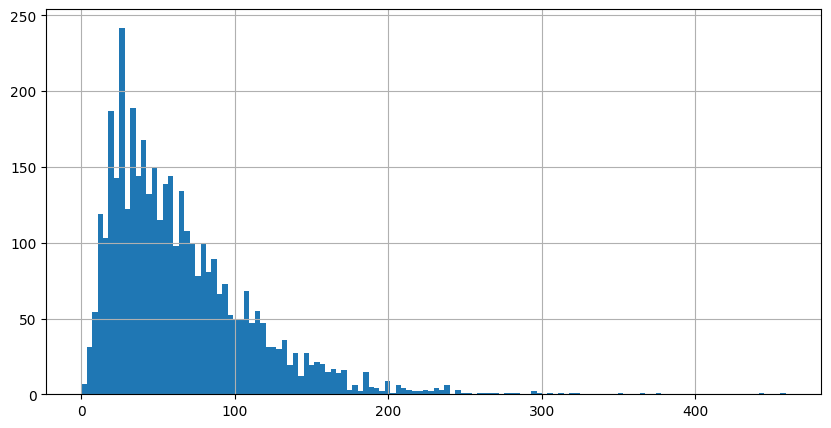

In [57]:
size = [len(tokens) for tokens in twitter_data_st['stemmed_content']]

plt.figure(figsize=(10, 5))
plt.hist(size, bins=130)
plt.grid(True)
plt.show()

In [59]:
X = twitter_data_st['stemmed_content'].values
Y = twitter_data_st['labels'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

model_LogisticRegression = LogisticRegression(max_iter=1000)
model_LogisticRegression.fit(X_train, Y_train)

X_train_prediction_lr = model_LogisticRegression.predict(X_train)
training_data_accuracy_lr = accuracy_score(Y_train, X_train_prediction_lr)

X_train_dense = X_train.toarray()
model_GaussianNB = GaussianNB()
result_bayes = model_GaussianNB.fit(X_train_dense, Y_train)

X_train_prediction_nb = model_GaussianNB.predict(X_train.toarray())
training_data_accuracy_nb = accuracy_score(Y_train, X_train_prediction_nb)

X_test_prediction_lr = model_LogisticRegression.predict(X_test)
test_data_accuracy_lr = accuracy_score(Y_test, X_test_prediction_lr)

X_test_prediction_nb = model_GaussianNB.predict(X_test.toarray())
test_data_accuracy_nb = accuracy_score(Y_test, X_test_prediction_nb)

print('Evaluating the accuracy of training data using logistic regression: ' , training_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB training data: ' , training_data_accuracy_nb)

print('Evaluating the accuracy of test data using logistic regression: ' , test_data_accuracy_lr)
print('Evaluating the accuracy of Gaussian NB test data: ' , test_data_accuracy_nb)

(3925,) (3140,) (785,)
Evaluating the accuracy of training data using logistic regression:  0.9191082802547771
Evaluating the accuracy of Gaussian NB training data:  0.9621019108280254
Evaluating the accuracy of test data using logistic regression:  0.7821656050955414
Evaluating the accuracy of Gaussian NB test data:  0.6700636942675159


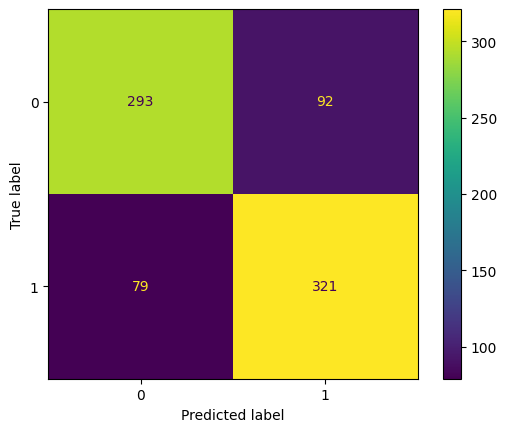

In [60]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_lr)).plot()
plt.show()

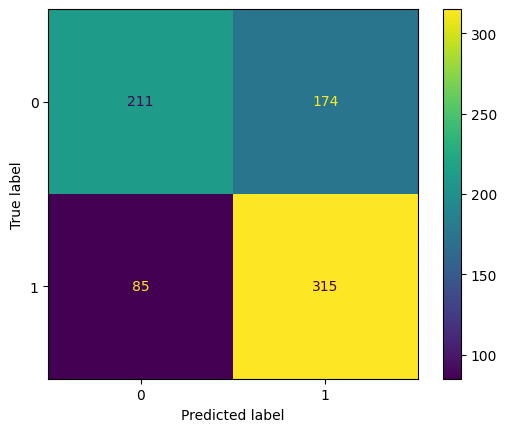

In [61]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_test, X_test_prediction_nb)).plot()
plt.show()